# Steel Plate Defect Prediction

This is a KAGGLE Competition on predicting the probability of various defects on steel plates.

There are 7 binary targets: Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps, Other_Faults. The objective is to predict the probability of each of the 7 binary targets of the test set. 

The data is already split in Train and Test sets.

The competition URL: https://www.kaggle.com/competitions/playground-series-s4e3/overview

https://www.kaggle.com/code/kidkoala/super-simple-defect-prediction-with-3-models

## Importing Libraries

In [1]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Reading the data

In [2]:
# Setting the pandas condition to display all columns
pd.set_option('display.max_columns', None)

In [3]:
# Locating the zip file
file = zipfile.ZipFile('..\Data\playground-series-s4e3.zip')

# Printing the filelist
for i in file.filelist:
    print(i.filename)

sample_submission.csv
test.csv
train.csv


In [4]:
# Openning the zip file and reading the provided csv file from KAGGLE

with file.open('train.csv') as t:
    df_train = pd.read_csv(t)
    
    
with file.open('test.csv') as te:
    df_test = pd.read_csv(te)

## Exploring the df

In [5]:
print('The train df contains {} rows and {} columns'.format(df_train.shape[0], df_train.shape[1]))

print('The test df contains {} rows and {} columns'.format(df_test.shape[0], df_test.shape[1]))

The train df contains 19219 rows and 35 columns
The test df contains 12814 rows and 28 columns


In [6]:
# Showing some columns of the df
df_train.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [7]:
# Concatening train df and the test df in one

total_df = pd.concat([df_train, df_test])

In [8]:
# Checking the null values of the df

total_df.isnull().sum()

id                           0
X_Minimum                    0
X_Maximum                    0
Y_Minimum                    0
Y_Maximum                    0
Pixels_Areas                 0
X_Perimeter                  0
Y_Perimeter                  0
Sum_of_Luminosity            0
Minimum_of_Luminosity        0
Maximum_of_Luminosity        0
Length_of_Conveyer           0
TypeOfSteel_A300             0
TypeOfSteel_A400             0
Steel_Plate_Thickness        0
Edges_Index                  0
Empty_Index                  0
Square_Index                 0
Outside_X_Index              0
Edges_X_Index                0
Edges_Y_Index                0
Outside_Global_Index         0
LogOfAreas                   0
Log_X_Index                  0
Log_Y_Index                  0
Orientation_Index            0
Luminosity_Index             0
SigmoidOfAreas               0
Pastry                   12814
Z_Scratch                12814
K_Scatch                 12814
Stains                   12814
Dirtines

We do not have null values in this df. We have null values only on the targeted labeles, with the exact number as the test df length (Soo, in test df these labeles are not present).

There are no null values in the train and the test df

In [9]:
# Descriptive Analysis of the train df

total_df.describe()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,32033.000000,32033.000000,32033.000000,3.203300e+04,3.203300e+04,32033.000000,32033.000000,32033.000000,3.203300e+04,32033.000000,32033.000000,32033.000000,32033.000000,32033.000000,32033.000000,32033.000000,32033.000000,32033.000000,32033.000000,32033.000000,32033.000000,32033.000000,32033.000000,32033.000000,32033.000000,32033.000000,32033.000000,32033.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,16016.000000,709.645334,753.624543,1.848467e+06,1.844775e+06,1679.555583,95.976618,64.366716,1.921837e+05,84.704274,128.663972,1459.664721,0.403677,0.595355,76.075329,0.353367,0.408989,0.574153,0.030644,0.616310,0.832521,0.589133,2.473182,1.312276,1.389089,0.102111,-0.138835,0.572102,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,9247.274923,531.669711,500.191878,1.908685e+06,1.902334e+06,3728.345922,195.752307,142.621733,4.581274e+05,28.764701,14.230437,145.784045,0.490642,0.490831,53.753964,0.318964,0.124288,0.258963,0.047850,0.221586,0.220701,0.482558,0.760776,0.467750,0.404018,0.487852,0.119363,0.332116,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,0.000000,4.000000,6.712000e+03,6.724000e+03,4.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.066700,0.000000,0.778200,0.301000,0.000000,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8008.000000,49.000000,214.000000,6.459330e+05,6.459920e+05,89.000000,15.000000,14.000000,9.948000e+03,68.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.058600,0.317300,0.375000,0.006600,0.454500,0.662700,0.000000,1.949400,1.000000,1.079200,-0.272700,-0.192600,0.257000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16016.000000,777.000000,796.000000,1.388373e+06,1.388398e+06,169.000000,25.000000,24.000000,1.836100e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,69.000000,0.240800,0.413000,0.545400,0.009500,0.636400,0.964300,1.000000,2.227900,1.146100,1.322200,0.111100,-0.143300,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,24024.000000,1152.000000,1166.000000,2.368032e+06,2.357532e+06,652.000000,64.000000,60.000000,6.790100e+04,105.000000,135.000000,1652.000000,1.000000,1.000000,80.000000,0.655200,0.494500,0.818200,0.019100,0.785700,1.000000,1.000000,2.814200,1.431400,1.707600,0.529400,-0.084200,0.999300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,32032.000000,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.943900,1.000000,0.747200,1.000000,1.000000,1.000000,4.680200,2.997300,4.258700,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Checking if we have duplicated values

total_df.duplicated().sum()

0

There are no duplicate values on the df

# EDA (Exploratory Data Analysis)

In [11]:
sns.set_style('darkgrid')

In [12]:
# defineing the targeted columns:

targets = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

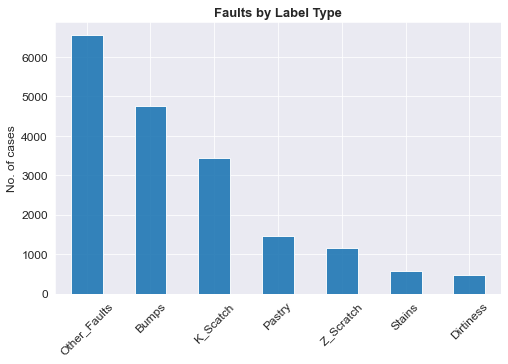

In [13]:
# Plotting Faults by the label type

faults_by_type = df_train[targets].sum().sort_values(ascending = False)

faults_by_type.plot(kind='bar', alpha = 0.9, figsize=(8,5))
plt.title('Faults by Label Type', fontsize = 13, fontweight = 'bold')
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize=12)
plt.ylabel('No. of cases', fontsize=12)

plt.show()

From the above chart we can observe that the majority of the cases are "Other_Faults", followed by "Bumps" and "K_Scatch"

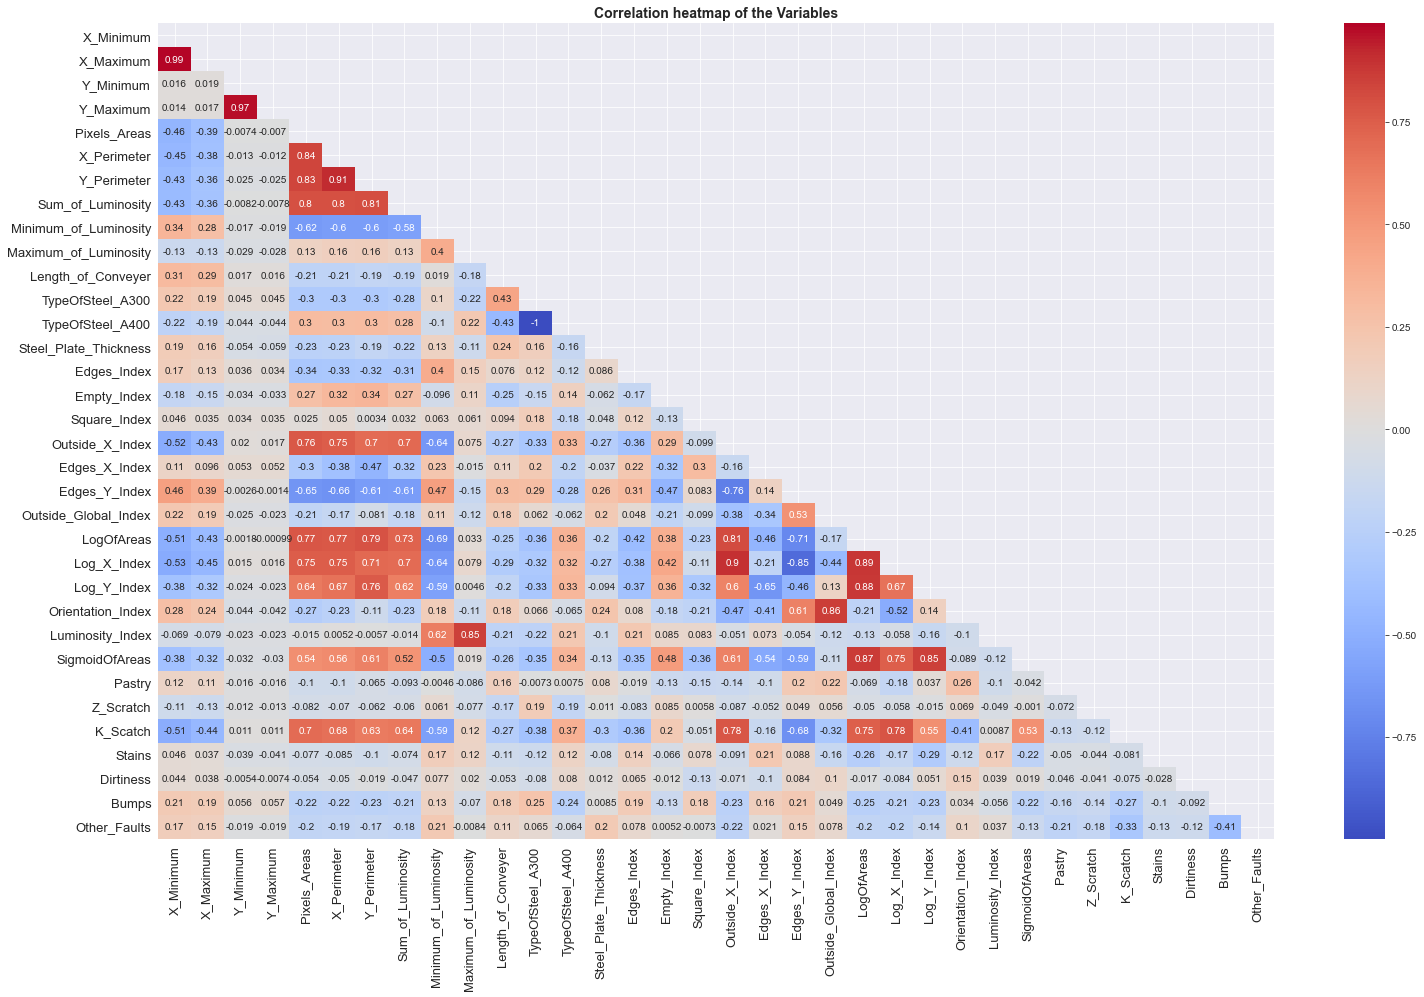

In [14]:
# Plotting the heatmap of correlations between features

fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(data=df_train.drop('id',axis=1).corr(), 
        annot=True, 
        mask = np.triu(np.ones_like(df_train.drop('id',axis=1).corr(), dtype=bool)),
           cmap='coolwarm')

plt.title('Correlation heatmap of the Variables', fontsize=14, fontweight = 'bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

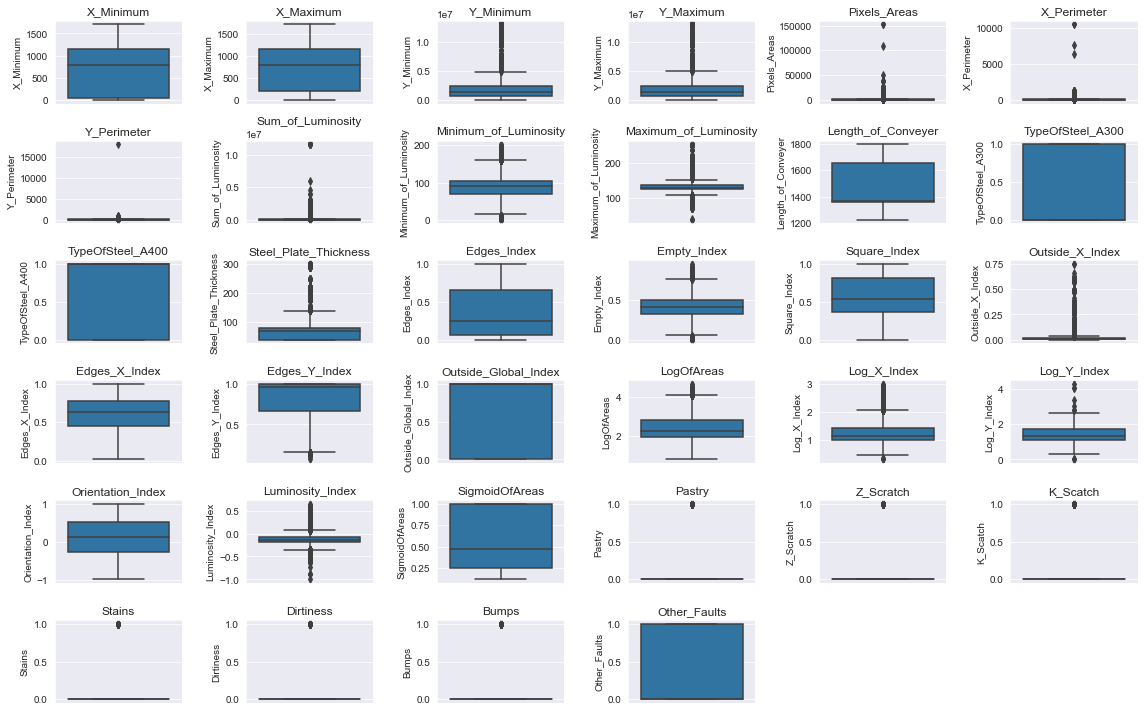

In [15]:
# Plotting the distribution of the columns

plt.figure(figsize=(16, 10))

for i, column in enumerate(total_df.drop('id',axis=1), start=1):
    plt.subplot(6, 6, i)
    sns.boxplot(y=total_df[column])
    plt.title(column)

plt.tight_layout()
plt.show();

There are a lot of features that are spread in a wide range. These points may be criticall in creating the model

## Feature Engineering

In [16]:
total_df.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [17]:
def feature_engineering(df):
    """
    This function is created to make the feature engineering process of this dataset
    """
    
    df['X_distance'] = df['X_Maximum'] - df['X_Minimum']
    df['Y_distance'] = df['Y_Maximum'] - df['Y_Minimum']
    
    df['Color_contrast'] = df['Maximum_of_Luminosity'] - df['Minimum_of_Luminosity']
    
    # Density Feature
    df['Density'] = df['Pixels_Areas'] / (df['X_Perimeter'] + df['Y_Perimeter'])
    
    return df

In [18]:
total_df = feature_engineering(total_df)

In [19]:
total_df.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,X_distance,Y_distance,Color_contrast,Density
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6,5,27,1.230769
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8,22,41,5.851351
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,153,68,112,10.122667
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8,27,20,4.666667
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20,45,29,3.748201


In [20]:
total_df.skew()

id                        0.000000
X_Minimum                 0.012553
X_Maximum                 0.066269
Y_Minimum                 2.570073
Y_Maximum                 2.565807
Pixels_Areas              7.228001
X_Perimeter              13.859640
Y_Perimeter              64.730920
Sum_of_Luminosity         7.807619
Minimum_of_Luminosity    -0.331854
Maximum_of_Luminosity     1.249437
Length_of_Conveyer        0.851547
TypeOfSteel_A300          0.392663
TypeOfSteel_A400         -0.388569
Steel_Plate_Thickness     2.372863
Edges_Index               0.538535
Empty_Index               0.209892
Square_Index              0.018202
Outside_X_Index           3.333037
Edges_X_Index            -0.253250
Edges_Y_Index            -0.991248
Outside_Global_Index     -0.362155
LogOfAreas                0.855029
Log_X_Index               1.103902
Log_Y_Index               0.401086
Orientation_Index        -0.185223
Luminosity_Index          0.719731
SigmoidOfAreas            0.220912
Pastry              

## Training the models

### Splitting the data into train and test sets

In [21]:
# Spliting train and test df after processing

train_df = total_df[:df_train.shape[0]]
test_df = total_df[df_train.shape[0]:].dropna(axis=1)

In [22]:
# Df that will be used for train 
train_df.drop('id', axis=1,inplace=True)

train_df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,X_distance,Y_distance,Color_contrast,Density
0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6,5,27,1.230769
1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8,22,41,5.851351
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,153,68,112,10.122667
3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8,27,20,4.666667
4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20,45,29,3.748201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,749,757,143210,143219,17,4,4,2193,122,140,1360,0,0,50,0.8950,0.1500,0.8571,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8,9,18,2.125000
19215,723,735,2488529,2488541,231,17,26,27135,104,133,1652,1,0,70,0.9243,0.3254,0.2778,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12,12,29,5.372093
19216,6,31,1578055,1578129,780,114,98,71112,41,94,1358,0,1,200,0.0148,0.4331,0.2281,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,25,74,53,3.679245
19217,9,18,1713172,1713184,126,13,26,14808,88,132,1692,1,0,60,0.0192,0.2361,0.0390,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,-0.1162,0.3509,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9,12,44,3.230769


In [23]:
# Train/Test splitting
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [24]:
X = train_df.drop(targets, axis = 1)

# Dropping columns that we used for feature engineering
# X = X.drop(['X_Maximum', 'X_Minimum', 'Y_Maximum', 'Y_Minimum','Maximum_of_Luminosity','Minimum_of_Luminosity','Pixels_Areas', 'X_Perimeter', 'Y_Perimeter'], axis = 1)

y = train_df[targets]

y_array = y.to_numpy()

y_array = np.argmax(y_array, axis=1)

# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_array,
                                                    test_size=0.2,
                                                    random_state=42)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15375, 31), (3844, 31), (15375,), (3844,))

## Xgboost

In [29]:
import optuna

In [104]:
# Define the objective function for Optuna optimization
def objective(trial, X_train, y_train, X_test, y_test):
    # Define parameters to be optimized for the XGBClassifier
#     param = {
#         "objective": 'multi:softmax',
#         "booster": 'gbtree',
#         "random_state": 42,
#         "num_class": 7,
#         'n_estimators': trial.suggest_int('n_estimators', 400, 1000),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
#         'gamma' : trial.suggest_float('gamma', 1e-9, 1.0),
#         'subsample': trial.suggest_float('subsample', 0.25, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.25, 1.0),
#         'max_depth': trial.suggest_int('max_depth', 0, 24),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 30),
#         'reg_lambda': trial.suggest_float('reg_lambda', 1e-9, 10.0, log=True),
#         'reg_alpha': trial.suggest_float('reg_alpha', 1e-9, 10.0, log=True),
#     }

    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'verbosity': 0,
        'booster': 'gbtree',
        'max_depth': trial.suggest_int('max_depth', 3, 5), 
        'learning_rate': trial.suggest_float('learning_rate', 0.009, 0.02, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 0.9, log=True), 
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 0.75, log=True), 
        'reg_alpha': trial.suggest_float('reg_alpha', 0.11, 0.195, log=True), 
        'reg_lambda': trial.suggest_float('reg_lambda', 0.55, 0.95, log=True), 
        'n_estimators': trial.suggest_int('n_estimators', 880, 920) 
    } 

    # Create an instance of LGBMClassifier with the suggested parameters
    xgb_classifier = XGBClassifier(**param)
    
    # Fit the classifier on the training data
    xgb_classifier.fit(X_train, y_train)

    # Evaluate the classifier on the test data
    #score = xgb_classifier.score(X_test, y_test)
    
   
    
    y_pred_prob = xgb_classifier.predict_proba(X_test)
    
    score = roc_auc_score(y_test, y_pred_prob, multi_class='ovo')
    
    #lgbm_log_loss = log_loss(y_test, y_pred_prob)
    print(f'SCORE: {score}')
    #print(f'Log Loss: {lgbm_log_loss}')

    return score

In [38]:
from sklearn.metrics import log_loss

In [105]:
# Set up the sampler for Optuna optimization
sampler = optuna.samplers.TPESampler(seed=42)  # Using Tree-structured Parzen Estimator sampler for optimization

# Create a study object for Optuna optimization
study = optuna.create_study(direction="maximize", sampler=sampler)


# Run the optimization process
study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=25)

# Get the best parameters after optimization
# Access the best hyperparameters
best_params = study.best_params
best_score = study.best_value

print("Best score:", best_score)
print("Best parameters:", best_params)

[I 2024-03-20 16:32:00,443] A new study created in memory with name: no-name-1a04c1b2-b7b4-4cd9-9a90-af33a5a57bdd
[I 2024-03-20 16:32:17,774] Trial 0 finished with value: 0.8884476553501413 and parameters: {'max_depth': 4, 'learning_rate': 0.01922818685625003, 'subsample': 0.8073260855488713, 'colsample_bytree': 0.5827664200255401, 'reg_alpha': 0.12027779573950619, 'reg_lambda': 0.598948789742988, 'n_estimators': 882}. Best is trial 0 with value: 0.8884476553501413.


SCORE: 0.8884476553501413


[I 2024-03-20 16:32:39,793] Trial 1 finished with value: 0.8875159925261003 and parameters: {'max_depth': 5, 'learning_rate': 0.014544596361168437, 'subsample': 0.7995334575737356, 'colsample_bytree': 0.4052094680533732, 'reg_alpha': 0.1916694687165668, 'reg_lambda': 0.8668661348608544, 'n_estimators': 888}. Best is trial 0 with value: 0.8884476553501413.


SCORE: 0.8875159925261003


[I 2024-03-20 16:32:57,829] Trial 2 finished with value: 0.8863942631372026 and parameters: {'max_depth': 3, 'learning_rate': 0.010419452481418314, 'subsample': 0.6787747055246852, 'colsample_bytree': 0.55631294360401, 'reg_alpha': 0.14086150578309897, 'reg_lambda': 0.6448951412748972, 'n_estimators': 905}. Best is trial 0 with value: 0.8884476553501413.


SCORE: 0.8863942631372026


[W 2024-03-20 16:32:59,224] Trial 3 failed with parameters: {'max_depth': 3, 'learning_rate': 0.011364612122532246, 'subsample': 0.6960883553463022, 'colsample_bytree': 0.5328042460403821, 'reg_alpha': 0.17243298588935188, 'reg_lambda': 0.613419307382746, 'n_estimators': 901} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\optuna\study\_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-105-bf49d5e4af72>", line 9, in <lambda>
    study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=25)
  File "<ipython-input-104-fa53e77b60f1>", line 38, in objective
    xgb_classifier.fit(X_train, y_train)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1515, in fit
    self._Booster = train

KeyboardInterrupt: 

In [40]:
xgb1 = XGBClassifier(**best_params)

xgb1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6702068058393846, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.019939809562296813,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=889, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [41]:
one_hot_y = np.zeros((y_test.shape[0], 7))

for i, argmax_val in enumerate(y_test):
    one_hot_y[i, argmax_val] = 1

In [42]:
from sklearn.metrics import roc_auc_score

In [99]:
# Get the predicted probabilities for the positive class
y_prob = xgb1.predict_proba(X_test)

one_hot_y = np.zeros((y_test.shape[0], 7))

for i, argmax_val in enumerate(y_test):
    one_hot_y[i, argmax_val] = 1

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovo')
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.8870119802841332


## Light GBM

In [45]:
TUNE = False

In [48]:
# Define the objective function for Optuna optimization
def objective(trial, X_train, y_train, X_test, y_test):
    # Define parameters to be optimized for the LGBMClassifier
    param = {
        "objective": "multiclass",
        "metric": "multi_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "random_state": 42,
        "num_class": 7,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.03),
        "n_estimators": trial.suggest_int("n_estimators", 400, 600),
        "lambda_l1": trial.suggest_float("lambda_l1", 0.005, 0.025),
        "lambda_l2": trial.suggest_float("lambda_l2", 0.02, 0.06),
        "max_depth": trial.suggest_int("max_depth", 6, 14),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.3, 0.9),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 50),
    }

    # Create an instance of LGBMClassifier with the suggested parameters
    lgbm_classifier = LGBMClassifier(**param)
    
    # Fit the classifier on the training data
    lgbm_classifier.fit(X_train, y_train)

    # Evaluate the classifier on the test data
    score = lgbm_classifier.score(X_test, y_test)
    
    print(f'SCORE: {score}')

    return score

# Set up the sampler for Optuna optimization
sampler = optuna.samplers.TPESampler(seed=42)  # Using Tree-structured Parzen Estimator sampler for optimization

# Create a study object for Optuna optimization
study = optuna.create_study(direction="maximize", sampler=sampler)


# Run the optimization process
study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=25)

# Get the best parameters after optimization
# Access the best hyperparameters
best_params_lgb = study.best_params
best_score_lgb = study.best_value

print("Best score:", best_params_lgb)
print("Best parameters:", best_score_lgb)

[I 2024-03-20 13:23:29,016] A new study created in memory with name: no-name-bb590969-3129-4550-9a63-d428ddd13931
[I 2024-03-20 13:23:34,864] Trial 0 finished with value: 0.5822060353798127 and parameters: {'learning_rate': 0.01749080237694725, 'n_estimators': 591, 'lambda_l1': 0.019639878836228104, 'lambda_l2': 0.04394633936788146, 'max_depth': 7, 'colsample_bytree': 0.3935967122017216, 'subsample': 0.5290418060840998, 'min_child_samples': 45}. Best is trial 0 with value: 0.5822060353798127.


SCORE: 0.5822060353798127


[I 2024-03-20 13:23:41,672] Trial 1 finished with value: 0.5806451612903226 and parameters: {'learning_rate': 0.022022300234864175, 'n_estimators': 542, 'lambda_l1': 0.005411689885916049, 'lambda_l2': 0.05879639408647977, 'max_depth': 13, 'colsample_bytree': 0.4274034664069657, 'subsample': 0.5909124836035503, 'min_child_samples': 17}. Best is trial 0 with value: 0.5822060353798127.


SCORE: 0.5806451612903226


[I 2024-03-20 13:23:48,044] Trial 2 finished with value: 0.5780437044745057 and parameters: {'learning_rate': 0.016084844859190754, 'n_estimators': 505, 'lambda_l1': 0.013638900372842315, 'lambda_l2': 0.03164916560792168, 'max_depth': 11, 'colsample_bytree': 0.3836963163912251, 'subsample': 0.6460723242676091, 'min_child_samples': 25}. Best is trial 0 with value: 0.5822060353798127.


SCORE: 0.5780437044745057


[I 2024-03-20 13:23:54,452] Trial 3 finished with value: 0.5803850156087409 and parameters: {'learning_rate': 0.019121399684340717, 'n_estimators': 557, 'lambda_l1': 0.008993475643167194, 'lambda_l2': 0.040569377536544465, 'max_depth': 11, 'colsample_bytree': 0.3278702476319986, 'subsample': 0.8037724259507192, 'min_child_samples': 16}. Best is trial 0 with value: 0.5822060353798127.


SCORE: 0.5803850156087409


[I 2024-03-20 13:24:01,594] Trial 4 finished with value: 0.5858480749219563 and parameters: {'learning_rate': 0.011301031859705591, 'n_estimators': 590, 'lambda_l1': 0.024312640661491188, 'lambda_l2': 0.05233589392465844, 'max_depth': 8, 'colsample_bytree': 0.35860326840383033, 'subsample': 0.8421165132560784, 'min_child_samples': 28}. Best is trial 4 with value: 0.5858480749219563.


SCORE: 0.5858480749219563


[I 2024-03-20 13:24:10,326] Trial 5 finished with value: 0.5822060353798127 and parameters: {'learning_rate': 0.012440764696895576, 'n_estimators': 499, 'lambda_l1': 0.005687770422304368, 'lambda_l2': 0.056372816083151284, 'max_depth': 8, 'colsample_bytree': 0.6975133706123893, 'subsample': 0.6558555380447055, 'min_child_samples': 31}. Best is trial 4 with value: 0.5858480749219563.


SCORE: 0.5822060353798127


[I 2024-03-20 13:24:20,268] Trial 6 finished with value: 0.5801248699271592 and parameters: {'learning_rate': 0.02093420558686559, 'n_estimators': 437, 'lambda_l1': 0.024391692555291174, 'lambda_l2': 0.051005312934444574, 'max_depth': 14, 'colsample_bytree': 0.8368964102565895, 'subsample': 0.7989499894055425, 'min_child_samples': 47}. Best is trial 4 with value: 0.5858480749219563.


SCORE: 0.5801248699271592


[I 2024-03-20 13:24:27,980] Trial 7 finished with value: 0.5814255983350677 and parameters: {'learning_rate': 0.01176985004103839, 'n_estimators': 439, 'lambda_l1': 0.005904545778210761, 'lambda_l2': 0.03301321323053057, 'max_depth': 9, 'colsample_bytree': 0.4628094190643376, 'subsample': 0.9143687545759647, 'min_child_samples': 24}. Best is trial 4 with value: 0.5858480749219563.


SCORE: 0.5814255983350677


[I 2024-03-20 13:24:39,829] Trial 8 finished with value: 0.5790842872008325 and parameters: {'learning_rate': 0.015618690193747614, 'n_estimators': 509, 'lambda_l1': 0.007818484499495253, 'lambda_l2': 0.05208787923016159, 'max_depth': 6, 'colsample_bytree': 0.8921321619603104, 'subsample': 0.8861223846483287, 'min_child_samples': 18}. Best is trial 4 with value: 0.5858480749219563.


SCORE: 0.5790842872008325


[I 2024-03-20 13:24:53,494] Trial 9 finished with value: 0.5840270551508845 and parameters: {'learning_rate': 0.010110442342472048, 'n_estimators': 563, 'lambda_l1': 0.01913714687695234, 'lambda_l2': 0.04916028672163949, 'max_depth': 12, 'colsample_bytree': 0.3444267910404542, 'subsample': 0.6792328642721364, 'min_child_samples': 14}. Best is trial 4 with value: 0.5858480749219563.


SCORE: 0.5840270551508845


[I 2024-03-20 13:25:03,825] Trial 10 finished with value: 0.5788241415192508 and parameters: {'learning_rate': 0.028902730884607736, 'n_estimators': 401, 'lambda_l1': 0.024390742215757315, 'lambda_l2': 0.020718475024592783, 'max_depth': 9, 'colsample_bytree': 0.5737965442802255, 'subsample': 0.9798853729727102, 'min_child_samples': 37}. Best is trial 4 with value: 0.5858480749219563.


SCORE: 0.5788241415192508


[I 2024-03-20 13:25:17,622] Trial 11 finished with value: 0.5780437044745057 and parameters: {'learning_rate': 0.010686644133682574, 'n_estimators': 600, 'lambda_l1': 0.019383427039533926, 'lambda_l2': 0.04725367117849426, 'max_depth': 12, 'colsample_bytree': 0.545786959973983, 'subsample': 0.7141458130951058, 'min_child_samples': 10}. Best is trial 4 with value: 0.5858480749219563.


SCORE: 0.5780437044745057


[I 2024-03-20 13:25:28,082] Trial 12 finished with value: 0.5798647242455776 and parameters: {'learning_rate': 0.010216716853241936, 'n_estimators': 560, 'lambda_l1': 0.0201383613743129, 'lambda_l2': 0.051002110280936375, 'max_depth': 10, 'colsample_bytree': 0.30512502386194673, 'subsample': 0.740980044304833, 'min_child_samples': 36}. Best is trial 4 with value: 0.5858480749219563.


SCORE: 0.5798647242455776


[I 2024-03-20 13:25:38,648] Trial 13 finished with value: 0.5780437044745057 and parameters: {'learning_rate': 0.01409731743565834, 'n_estimators': 574, 'lambda_l1': 0.015731833347589364, 'lambda_l2': 0.03392344508904953, 'max_depth': 8, 'colsample_bytree': 0.48521932813054125, 'subsample': 0.8388780227349882, 'min_child_samples': 10}. Best is trial 4 with value: 0.5858480749219563.


SCORE: 0.5780437044745057


[I 2024-03-20 13:25:55,607] Trial 14 finished with value: 0.5759625390218522 and parameters: {'learning_rate': 0.02629567438009795, 'n_estimators': 533, 'lambda_l1': 0.021879602034223896, 'lambda_l2': 0.04578694741072342, 'max_depth': 12, 'colsample_bytree': 0.7568155383247331, 'subsample': 0.731057379200564, 'min_child_samples': 25}. Best is trial 4 with value: 0.5858480749219563.


SCORE: 0.5759625390218522


[I 2024-03-20 13:26:08,592] Trial 15 finished with value: 0.5783038501560874 and parameters: {'learning_rate': 0.013847197571767913, 'n_estimators': 580, 'lambda_l1': 0.01617597166086629, 'lambda_l2': 0.054967417800700975, 'max_depth': 6, 'colsample_bytree': 0.6748205360139181, 'subsample': 0.6721625155951679, 'min_child_samples': 42}. Best is trial 4 with value: 0.5858480749219563.


SCORE: 0.5783038501560874


[I 2024-03-20 13:26:19,294] Trial 16 finished with value: 0.581165452653486 and parameters: {'learning_rate': 0.023250341969671996, 'n_estimators': 528, 'lambda_l1': 0.022260803346324406, 'lambda_l2': 0.03856665984179805, 'max_depth': 14, 'colsample_bytree': 0.35302640104351707, 'subsample': 0.5023700598265446, 'min_child_samples': 32}. Best is trial 4 with value: 0.5858480749219563.


SCORE: 0.581165452653486


[I 2024-03-20 13:26:28,831] Trial 17 finished with value: 0.5840270551508845 and parameters: {'learning_rate': 0.010008633432490196, 'n_estimators': 483, 'lambda_l1': 0.017586573320596308, 'lambda_l2': 0.04904501297587506, 'max_depth': 10, 'colsample_bytree': 0.5120606464604247, 'subsample': 0.9501074183915026, 'min_child_samples': 21}. Best is trial 4 with value: 0.5858480749219563.


SCORE: 0.5840270551508845


[I 2024-03-20 13:26:40,298] Trial 18 finished with value: 0.5790842872008325 and parameters: {'learning_rate': 0.012959153816893384, 'n_estimators': 563, 'lambda_l1': 0.013601014773930099, 'lambda_l2': 0.041570911156585275, 'max_depth': 12, 'colsample_bytree': 0.6054706056780178, 'subsample': 0.8424757897666216, 'min_child_samples': 50}. Best is trial 4 with value: 0.5858480749219563.


SCORE: 0.5790842872008325


[I 2024-03-20 13:26:47,614] Trial 19 finished with value: 0.5806451612903226 and parameters: {'learning_rate': 0.018526933321881878, 'n_estimators': 472, 'lambda_l1': 0.022322926556369933, 'lambda_l2': 0.05531175927762593, 'max_depth': 8, 'colsample_bytree': 0.40227676711926785, 'subsample': 0.6038082974747999, 'min_child_samples': 13}. Best is trial 4 with value: 0.5858480749219563.


SCORE: 0.5806451612903226


[I 2024-03-20 13:26:57,549] Trial 20 finished with value: 0.5777835587929241 and parameters: {'learning_rate': 0.015587956472910974, 'n_estimators': 599, 'lambda_l1': 0.012589211243627073, 'lambda_l2': 0.022430186521487212, 'max_depth': 11, 'colsample_bytree': 0.4708951152105173, 'subsample': 0.7842690389251394, 'min_child_samples': 29}. Best is trial 4 with value: 0.5858480749219563.


SCORE: 0.5777835587929241


[I 2024-03-20 13:27:04,774] Trial 21 finished with value: 0.5806451612903226 and parameters: {'learning_rate': 0.010311831719110837, 'n_estimators': 477, 'lambda_l1': 0.01753034983050731, 'lambda_l2': 0.04887241476172429, 'max_depth': 10, 'colsample_bytree': 0.3057347469399282, 'subsample': 0.9993779432733407, 'min_child_samples': 20}. Best is trial 4 with value: 0.5858480749219563.


SCORE: 0.5806451612903226


[I 2024-03-20 13:27:14,939] Trial 22 finished with value: 0.581945889698231 and parameters: {'learning_rate': 0.011727807325140513, 'n_estimators': 473, 'lambda_l1': 0.017826116649449907, 'lambda_l2': 0.058849982514752736, 'max_depth': 10, 'colsample_bytree': 0.5433221074142481, 'subsample': 0.9370758204210594, 'min_child_samples': 21}. Best is trial 4 with value: 0.5858480749219563.


SCORE: 0.581945889698231


[I 2024-03-20 13:27:25,231] Trial 23 finished with value: 0.5824661810613944 and parameters: {'learning_rate': 0.014318796846777464, 'n_estimators': 546, 'lambda_l1': 0.011488953630452697, 'lambda_l2': 0.05287211378997812, 'max_depth': 9, 'colsample_bytree': 0.4979777949611455, 'subsample': 0.861482420849788, 'min_child_samples': 14}. Best is trial 4 with value: 0.5858480749219563.


SCORE: 0.5824661810613944


[I 2024-03-20 13:27:33,147] Trial 24 finished with value: 0.5850676378772113 and parameters: {'learning_rate': 0.012021742173197125, 'n_estimators': 520, 'lambda_l1': 0.01822838580354945, 'lambda_l2': 0.0438831819003057, 'max_depth': 7, 'colsample_bytree': 0.3671767666427314, 'subsample': 0.9447782097330527, 'min_child_samples': 23}. Best is trial 4 with value: 0.5858480749219563.


SCORE: 0.5850676378772113
Best score: {'learning_rate': 0.011301031859705591, 'n_estimators': 590, 'lambda_l1': 0.024312640661491188, 'lambda_l2': 0.05233589392465844, 'max_depth': 8, 'colsample_bytree': 0.35860326840383033, 'subsample': 0.8421165132560784, 'min_child_samples': 28}
Best parameters: 0.5858480749219563


In [49]:
lgb1 = LGBMClassifier(**best_params_lgb)

lgb1.fit(X_train, y_train)

[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001891 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606

LGBMClassifier(colsample_bytree=0.35860326840383033,
               lambda_l1=0.024312640661491188, lambda_l2=0.05233589392465844,
               learning_rate=0.011301031859705591, max_depth=8,
               min_child_samples=28, n_estimators=590,
               subsample=0.8421165132560784)

In [101]:
# Get the predicted probabilities for the positive class
y_prob_lgb = lgb1.predict_proba(X_test)

# Calculate ROC-AUC score
roc_auc_lgb = roc_auc_score(y_test, y_prob_lgb, multi_class='ovo')
print("ROC-AUC Score:", roc_auc_lgb)

[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
ROC-AUC Score: 0.8872039591283621


## Catboost

In [65]:
import catboost
from catboost import CatBoostClassifier

In [66]:
# Define the objective function for Optuna optimization
def objective(trial, X_train, y_train, X_test, y_test):
    # Define parameters to be optimized for the LGBMClassifier
    param = {
        "verbose": False,

        "random_seed": 42,
        
        "learning_rate": trial.suggest_float("learning_rate", 0.1, 0.15),
        "iterations": trial.suggest_int("iterations", 700, 1000),

        "depth": trial.suggest_int("depth", 5, 7),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 5, 7),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.5, 1.0),

    }

    # Create an instance of LGBMClassifier with the suggested parameters
    lgbm_classifier = CatBoostClassifier(**param)
    
    # Fit the classifier on the training data
    lgbm_classifier.fit(X_train, y_train)

    # Evaluate the classifier on the test data
    score = lgbm_classifier.score(X_test, y_test)
    
    print(f'SCORE: {score}')

    return score

# Set up the sampler for Optuna optimization
sampler = optuna.samplers.TPESampler(seed=42)  # Using Tree-structured Parzen Estimator sampler for optimization

# Create a study object for Optuna optimization
study = optuna.create_study(direction="maximize", sampler=sampler)


# Run the optimization process
study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=25)

# Get the best parameters after optimization
# Access the best hyperparameters
best_params_cat = study.best_params
best_score_cat = study.best_value

print("Best score:", best_score_cat)
print("Best parameters:", best_params_cat)

[I 2024-03-20 14:00:44,153] A new study created in memory with name: no-name-9c0fad82-d0a9-4a40-a526-4fd33ddfdc07
[I 2024-03-20 14:02:46,692] Trial 0 finished with value: 0.5655567117585848 and parameters: {'learning_rate': 0.11872700594236812, 'iterations': 986, 'depth': 7, 'l2_leaf_reg': 6.197316968394073, 'bagging_temperature': 0.5780093202212182}. Best is trial 0 with value: 0.5655567117585848.


SCORE: 0.5655567117585848


[I 2024-03-20 14:04:19,211] Trial 1 finished with value: 0.5741415192507804 and parameters: {'learning_rate': 0.10779972601681014, 'iterations': 717, 'depth': 7, 'l2_leaf_reg': 6.202230023486417, 'bagging_temperature': 0.8540362888980227}. Best is trial 1 with value: 0.5741415192507804.


SCORE: 0.5741415192507804


[I 2024-03-20 14:06:20,893] Trial 2 finished with value: 0.5676378772112383 and parameters: {'learning_rate': 0.10102922471479013, 'iterations': 991, 'depth': 7, 'l2_leaf_reg': 5.424678221356553, 'bagging_temperature': 0.5909124836035503}. Best is trial 1 with value: 0.5741415192507804.


SCORE: 0.5676378772112383


[I 2024-03-20 14:06:56,791] Trial 3 finished with value: 0.5658168574401665 and parameters: {'learning_rate': 0.10917022549267169, 'iterations': 791, 'depth': 6, 'l2_leaf_reg': 5.863890037284231, 'bagging_temperature': 0.645614570099021}. Best is trial 1 with value: 0.5741415192507804.


SCORE: 0.5658168574401665


[I 2024-03-20 14:07:20,256] Trial 4 finished with value: 0.573621227887617 and parameters: {'learning_rate': 0.13059264473611898, 'iterations': 741, 'depth': 5, 'l2_leaf_reg': 5.732723686587383, 'bagging_temperature': 0.728034992108518}. Best is trial 1 with value: 0.5741415192507804.


SCORE: 0.573621227887617


[I 2024-03-20 14:07:56,484] Trial 5 finished with value: 0.5715400624349636 and parameters: {'learning_rate': 0.1392587980696507, 'iterations': 760, 'depth': 6, 'l2_leaf_reg': 6.184829137724085, 'bagging_temperature': 0.5232252063599989}. Best is trial 1 with value: 0.5741415192507804.


SCORE: 0.5715400624349636


[I 2024-03-20 14:08:18,770] Trial 6 finished with value: 0.5803850156087409 and parameters: {'learning_rate': 0.1303772425950719, 'iterations': 751, 'depth': 5, 'l2_leaf_reg': 6.897771074506666, 'bagging_temperature': 0.9828160165372797}. Best is trial 6 with value: 0.5803850156087409.


SCORE: 0.5803850156087409


[I 2024-03-20 14:08:43,833] Trial 7 finished with value: 0.5704994797086368 and parameters: {'learning_rate': 0.14041986740582305, 'iterations': 791, 'depth': 5, 'l2_leaf_reg': 6.368466053024314, 'bagging_temperature': 0.7200762468698007}. Best is trial 6 with value: 0.5803850156087409.


SCORE: 0.5704994797086368


[I 2024-03-20 14:09:09,529] Trial 8 finished with value: 0.5731009365244537 and parameters: {'learning_rate': 0.10610191174223894, 'iterations': 849, 'depth': 5, 'l2_leaf_reg': 6.818640804157564, 'bagging_temperature': 0.6293899908000085}. Best is trial 6 with value: 0.5803850156087409.


SCORE: 0.5731009365244537


[I 2024-03-20 14:09:46,472] Trial 9 finished with value: 0.5658168574401665 and parameters: {'learning_rate': 0.1331261142176991, 'iterations': 793, 'depth': 6, 'l2_leaf_reg': 6.093420558686559, 'bagging_temperature': 0.5924272277627636}. Best is trial 6 with value: 0.5803850156087409.


SCORE: 0.5658168574401665


[I 2024-03-20 14:10:13,625] Trial 10 finished with value: 0.5746618106139438 and parameters: {'learning_rate': 0.1477507794645142, 'iterations': 910, 'depth': 5, 'l2_leaf_reg': 6.910289658083226, 'bagging_temperature': 0.991948117710163}. Best is trial 6 with value: 0.5803850156087409.


SCORE: 0.5746618106139438


[I 2024-03-20 14:10:41,375] Trial 11 finished with value: 0.5725806451612904 and parameters: {'learning_rate': 0.14543307056116936, 'iterations': 918, 'depth': 5, 'l2_leaf_reg': 6.940451773164179, 'bagging_temperature': 0.9988392431163264}. Best is trial 6 with value: 0.5803850156087409.


SCORE: 0.5725806451612904


[I 2024-03-20 14:11:07,661] Trial 12 finished with value: 0.5744016649323621 and parameters: {'learning_rate': 0.14969383971253442, 'iterations': 885, 'depth': 5, 'l2_leaf_reg': 6.625883459426456, 'bagging_temperature': 0.9970029045473664}. Best is trial 6 with value: 0.5803850156087409.


SCORE: 0.5744016649323621


[I 2024-03-20 14:11:35,694] Trial 13 finished with value: 0.5733610822060354 and parameters: {'learning_rate': 0.12216974223740196, 'iterations': 917, 'depth': 5, 'l2_leaf_reg': 6.644928101201927, 'bagging_temperature': 0.87751857852521}. Best is trial 6 with value: 0.5803850156087409.


SCORE: 0.5733610822060354


[I 2024-03-20 14:12:15,938] Trial 14 finished with value: 0.5671175858480749 and parameters: {'learning_rate': 0.12991242667016387, 'iterations': 858, 'depth': 6, 'l2_leaf_reg': 5.172737843638541, 'bagging_temperature': 0.8859620061900357}. Best is trial 6 with value: 0.5803850156087409.


SCORE: 0.5671175858480749


[I 2024-03-20 14:12:44,160] Trial 15 finished with value: 0.576222684703434 and parameters: {'learning_rate': 0.11679455819132505, 'iterations': 938, 'depth': 5, 'l2_leaf_reg': 6.979263593698334, 'bagging_temperature': 0.939018287169786}. Best is trial 6 with value: 0.5803850156087409.


SCORE: 0.576222684703434


[I 2024-03-20 14:13:29,591] Trial 16 finished with value: 0.568678459937565 and parameters: {'learning_rate': 0.11548903780261084, 'iterations': 948, 'depth': 6, 'l2_leaf_reg': 6.5921232646725425, 'bagging_temperature': 0.9219900508555976}. Best is trial 6 with value: 0.5803850156087409.


SCORE: 0.568678459937565


[I 2024-03-20 14:13:49,963] Trial 17 finished with value: 0.5731009365244537 and parameters: {'learning_rate': 0.11550186135528008, 'iterations': 703, 'depth': 5, 'l2_leaf_reg': 6.440030315635792, 'bagging_temperature': 0.8123826628833544}. Best is trial 6 with value: 0.5803850156087409.


SCORE: 0.5731009365244537


[I 2024-03-20 14:14:30,294] Trial 18 finished with value: 0.5759625390218522 and parameters: {'learning_rate': 0.12610081121985114, 'iterations': 842, 'depth': 6, 'l2_leaf_reg': 6.989327522246226, 'bagging_temperature': 0.9461168316185474}. Best is trial 6 with value: 0.5803850156087409.


SCORE: 0.5759625390218522


[I 2024-03-20 14:14:57,760] Trial 19 finished with value: 0.5671175858480749 and parameters: {'learning_rate': 0.13624228382004705, 'iterations': 955, 'depth': 5, 'l2_leaf_reg': 6.70256491708901, 'bagging_temperature': 0.7792023430452037}. Best is trial 6 with value: 0.5803850156087409.


SCORE: 0.5671175858480749


[I 2024-03-20 14:15:36,824] Trial 20 finished with value: 0.5699791883454735 and parameters: {'learning_rate': 0.12472410639324662, 'iterations': 824, 'depth': 6, 'l2_leaf_reg': 6.404079429182973, 'bagging_temperature': 0.9349773319039604}. Best is trial 6 with value: 0.5803850156087409.


SCORE: 0.5699791883454735


[I 2024-03-20 14:16:15,216] Trial 21 finished with value: 0.5725806451612904 and parameters: {'learning_rate': 0.12480826522968438, 'iterations': 833, 'depth': 6, 'l2_leaf_reg': 6.912072915570201, 'bagging_temperature': 0.9404457467183632}. Best is trial 6 with value: 0.5803850156087409.


SCORE: 0.5725806451612904


[I 2024-03-20 14:16:41,979] Trial 22 finished with value: 0.5777835587929241 and parameters: {'learning_rate': 0.12817398126966248, 'iterations': 886, 'depth': 5, 'l2_leaf_reg': 6.98356563699367, 'bagging_temperature': 0.9469709165719888}. Best is trial 6 with value: 0.5803850156087409.


SCORE: 0.5777835587929241


[I 2024-03-20 14:17:07,504] Trial 23 finished with value: 0.5707596253902185 and parameters: {'learning_rate': 0.11569461753152548, 'iterations': 883, 'depth': 5, 'l2_leaf_reg': 6.759178641288233, 'bagging_temperature': 0.8352402980331254}. Best is trial 6 with value: 0.5803850156087409.


SCORE: 0.5707596253902185


[I 2024-03-20 14:17:36,167] Trial 24 finished with value: 0.5725806451612904 and parameters: {'learning_rate': 0.12116524784980832, 'iterations': 953, 'depth': 5, 'l2_leaf_reg': 6.511381330647143, 'bagging_temperature': 0.9005521219889144}. Best is trial 6 with value: 0.5803850156087409.


SCORE: 0.5725806451612904
Best score: 0.5803850156087409
Best parameters: {'learning_rate': 0.1303772425950719, 'iterations': 751, 'depth': 5, 'l2_leaf_reg': 6.897771074506666, 'bagging_temperature': 0.9828160165372797}


In [67]:
cat1 = CatBoostClassifier(**best_params_cat)

cat1.fit(X_train, y_train)

0:	learn: 1.7331605	total: 30.9ms	remaining: 23.2s
1:	learn: 1.6085568	total: 58.6ms	remaining: 21.9s
2:	learn: 1.5135938	total: 81.3ms	remaining: 20.3s
3:	learn: 1.4452333	total: 101ms	remaining: 18.8s
4:	learn: 1.3880616	total: 118ms	remaining: 17.6s
5:	learn: 1.3480973	total: 135ms	remaining: 16.8s
6:	learn: 1.3045303	total: 152ms	remaining: 16.1s
7:	learn: 1.2741493	total: 170ms	remaining: 15.8s
8:	learn: 1.2492417	total: 187ms	remaining: 15.4s
9:	learn: 1.2233110	total: 204ms	remaining: 15.1s
10:	learn: 1.2024615	total: 224ms	remaining: 15.1s
11:	learn: 1.1812396	total: 247ms	remaining: 15.2s
12:	learn: 1.1694158	total: 267ms	remaining: 15.1s
13:	learn: 1.1569630	total: 284ms	remaining: 15s
14:	learn: 1.1423074	total: 301ms	remaining: 14.8s
15:	learn: 1.1321713	total: 316ms	remaining: 14.5s
16:	learn: 1.1162001	total: 334ms	remaining: 14.4s
17:	learn: 1.1051120	total: 352ms	remaining: 14.3s
18:	learn: 1.0956740	total: 369ms	remaining: 14.2s
19:	learn: 1.0882978	total: 386ms	remain

In [100]:
# Get the predicted probabilities for the positive class
y_prob_cat = cat1.predict_proba(X_test)

# Calculate ROC-AUC score
roc_auc_lgb = roc_auc_score(y_test, y_prob_cat, multi_class='ovo')
print("ROC-AUC Score:", roc_auc_lgb)

ROC-AUC Score: 0.8832019400667088


In [73]:
from sklearn.ensemble import VotingClassifier, StackingClassifier

In [74]:
# Define the objective function for Optuna optimization
def objective(trial, X_train, y_train, X_test, y_test):
    # Define parameters to be optimized for the weighted ensemble
    
    obj_estimators = [
        ('LGBM', LGBMClassifier(**best_params_lgb)),
        ('XGB', XGBClassifier(**best_params)),
        ('CAT', CatBoostClassifier(**best_params_cat))
    ]
    
    voting_classifier = VotingClassifier(
        estimators=obj_estimators,
        voting='soft',
        weights=[
            trial.suggest_float('LGBM_Weight', 0.00, 10.00),
            trial.suggest_float('XGB_Weight', 0.00, 10.00),
            trial.suggest_float('CAT_Weight', 0.00, 10.00),
        ],
    )
    
    voting_classifier.fit(X_train, y_train)
    
    predict_probs = voting_classifier.predict_proba(X_test)
    
    auc_score = roc_auc_score(one_hot_y, predict_probs, multi_class='ovo')

    return auc_score

# Set up the sampler for Optuna optimization
weight_sampler = optuna.samplers.TPESampler(seed=42)  # Using Tree-structured Parzen Estimator sampler for optimization

# Create a study object for Optuna optimization
weight_study = optuna.create_study(direction="maximize", sampler=weight_sampler)

# Run the optimization process
weight_study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=20)

# Get the best parameters after optimization
weight_best_params = weight_study.best_params
    
print(f'BEST WEIGHTS: {weight_best_params}')

[I 2024-03-20 14:25:05,270] A new study created in memory with name: no-name-66870f62-7c44-4841-9715-1dabf736d69b


[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606

[I 2024-03-20 14:26:06,609] Trial 0 finished with value: 0.8734965771003079 and parameters: {'LGBM_Weight': 3.745401188473625, 'XGB_Weight': 9.50714306409916, 'CAT_Weight': 7.319939418114051}. Best is trial 0 with value: 0.8734965771003079.


[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606

[I 2024-03-20 14:27:04,746] Trial 1 finished with value: 0.8739607768995379 and parameters: {'LGBM_Weight': 5.986584841970366, 'XGB_Weight': 1.5601864044243652, 'CAT_Weight': 1.5599452033620265}. Best is trial 1 with value: 0.8739607768995379.


[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001996 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606

[I 2024-03-20 14:28:14,011] Trial 2 finished with value: 0.8731519741612892 and parameters: {'LGBM_Weight': 0.5808361216819946, 'XGB_Weight': 8.661761457749352, 'CAT_Weight': 6.011150117432088}. Best is trial 1 with value: 0.8739607768995379.


[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606

[I 2024-03-20 14:29:19,090] Trial 3 finished with value: 0.8728038375511284 and parameters: {'LGBM_Weight': 7.080725777960454, 'XGB_Weight': 0.20584494295802447, 'CAT_Weight': 9.699098521619943}. Best is trial 1 with value: 0.8739607768995379.


[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606

[I 2024-03-20 14:30:21,848] Trial 4 finished with value: 0.8739682081072537 and parameters: {'LGBM_Weight': 8.324426408004218, 'XGB_Weight': 2.1233911067827616, 'CAT_Weight': 1.8182496720710062}. Best is trial 4 with value: 0.8739682081072537.


[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001988 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606

[I 2024-03-20 14:31:25,394] Trial 5 finished with value: 0.8729307630609648 and parameters: {'LGBM_Weight': 1.8340450985343382, 'XGB_Weight': 3.0424224295953772, 'CAT_Weight': 5.247564316322379}. Best is trial 4 with value: 0.8739682081072537.


[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606

[I 2024-03-20 14:32:30,340] Trial 6 finished with value: 0.873272585555703 and parameters: {'LGBM_Weight': 4.319450186421157, 'XGB_Weight': 2.9122914019804194, 'CAT_Weight': 6.118528947223795}. Best is trial 4 with value: 0.8739682081072537.


[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606

[I 2024-03-20 14:33:30,753] Trial 7 finished with value: 0.8731754424079143 and parameters: {'LGBM_Weight': 1.3949386065204183, 'XGB_Weight': 2.9214464853521815, 'CAT_Weight': 3.663618432936917}. Best is trial 4 with value: 0.8739682081072537.


[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606

[I 2024-03-20 14:34:31,992] Trial 8 finished with value: 0.87387863582888 and parameters: {'LGBM_Weight': 4.56069984217036, 'XGB_Weight': 7.851759613930136, 'CAT_Weight': 1.9967378215835974}. Best is trial 4 with value: 0.8739682081072537.


[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606

[I 2024-03-20 14:35:40,804] Trial 9 finished with value: 0.8738938708854105 and parameters: {'LGBM_Weight': 5.142344384136116, 'XGB_Weight': 5.924145688620425, 'CAT_Weight': 0.46450412719997725}. Best is trial 4 with value: 0.8739682081072537.


[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606

[I 2024-03-20 14:36:44,504] Trial 10 finished with value: 0.8740032851452962 and parameters: {'LGBM_Weight': 9.779960740812001, 'XGB_Weight': 5.588508982574675, 'CAT_Weight': 3.1058517905939125}. Best is trial 10 with value: 0.8740032851452962.


[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001999 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606

[I 2024-03-20 14:38:03,574] Trial 11 finished with value: 0.8739889554517296 and parameters: {'LGBM_Weight': 9.526412567603433, 'XGB_Weight': 5.522332938560959, 'CAT_Weight': 3.360567190779755}. Best is trial 10 with value: 0.8740032851452962.


[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606

[I 2024-03-20 14:39:26,021] Trial 12 finished with value: 0.8739925901037217 and parameters: {'LGBM_Weight': 9.84839916699623, 'XGB_Weight': 5.777983410965588, 'CAT_Weight': 3.347951762232364}. Best is trial 10 with value: 0.8740032851452962.


[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003545 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606

[I 2024-03-20 14:40:35,238] Trial 13 finished with value: 0.8739720583337933 and parameters: {'LGBM_Weight': 9.976856252039022, 'XGB_Weight': 6.7871453810766535, 'CAT_Weight': 3.728038465785912}. Best is trial 10 with value: 0.8740032851452962.


[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003959 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606

[I 2024-03-20 14:41:40,247] Trial 14 finished with value: 0.8739769807523686 and parameters: {'LGBM_Weight': 8.119849770050667, 'XGB_Weight': 4.3435627175641125, 'CAT_Weight': 2.940342001097702}. Best is trial 10 with value: 0.8740032851452962.


[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606

[I 2024-03-20 14:42:39,408] Trial 15 finished with value: 0.873925338343662 and parameters: {'LGBM_Weight': 8.388674352868932, 'XGB_Weight': 4.271123056333319, 'CAT_Weight': 0.1740067514833208}. Best is trial 10 with value: 0.8740032851452962.


[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006746 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606

[I 2024-03-20 14:44:01,342] Trial 16 finished with value: 0.8738517197016683 and parameters: {'LGBM_Weight': 7.002632530670036, 'XGB_Weight': 6.991821638570928, 'CAT_Weight': 4.602940659541848}. Best is trial 10 with value: 0.8740032851452962.


[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003917 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606

[I 2024-03-20 14:45:21,399] Trial 17 finished with value: 0.8736488959232577 and parameters: {'LGBM_Weight': 9.308358815539814, 'XGB_Weight': 4.753069206135342, 'CAT_Weight': 7.894770663194647}. Best is trial 10 with value: 0.8740032851452962.


[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003556 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606

[I 2024-03-20 14:46:50,919] Trial 18 finished with value: 0.873858045878369 and parameters: {'LGBM_Weight': 7.0116259539376, 'XGB_Weight': 6.5782677201687365, 'CAT_Weight': 4.568176065240216}. Best is trial 10 with value: 0.8740032851452962.


[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606

[I 2024-03-20 14:48:07,641] Trial 19 finished with value: 0.8737989554135358 and parameters: {'LGBM_Weight': 3.4279928826631636, 'XGB_Weight': 8.186863767196588, 'CAT_Weight': 2.5621901693743725}. Best is trial 10 with value: 0.8740032851452962.


BEST WEIGHTS: {'LGBM_Weight': 9.779960740812001, 'XGB_Weight': 5.588508982574675, 'CAT_Weight': 3.1058517905939125}


In [75]:
weight_best_params

{'LGBM_Weight': 9.779960740812001,
 'XGB_Weight': 5.588508982574675,
 'CAT_Weight': 3.1058517905939125}

In [77]:
    obj_estimators = [
        ('LGBM', LGBMClassifier(**best_params_lgb)),
        ('XGB', XGBClassifier(**best_params)),
        ('CAT', CatBoostClassifier(**best_params_cat))
    ]

In [78]:
voting_classifier = VotingClassifier(
    estimators=obj_estimators,
    voting='soft',
    weights=[
        9.779960740812001,
        5.588508982574675,
        3.1058517905939125,
    ],
)

voting_classifier.fit(X_train, y_train)

[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001789 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606

VotingClassifier(estimators=[('LGBM',
                              LGBMClassifier(colsample_bytree=0.35860326840383033,
                                             lambda_l1=0.024312640661491188,
                                             lambda_l2=0.05233589392465844,
                                             learning_rate=0.011301031859705591,
                                             max_depth=8, min_child_samples=28,
                                             n_estimators=590,
                                             subsample=0.8421165132560784)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=N...
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=889, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('CAT',
                              <catboost.core.CatBoostClassifier object at 0x000002515F54EAC0>)],
                 voting='soft',
                 weights=[9.779960740812001, 5.588508982574675,
                          3.1058517905939125])

In [88]:
roc_auc_score(y_test, y_prob_vot, multi_class='ovo')

0.8878200202850689

In [90]:
# Get the predicted probabilities for the positive class
y_prob_vot = voting_classifier.predict_proba(X_test)

# Calculate ROC-AUC score
roc_auc_vot = roc_auc_score(y_test, y_prob_vot, multi_class='ovo')
print("ROC-AUC Score:", roc_auc_vot)

[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
ROC-AUC Score: 0.8878200202850689


In [103]:
print('Xgboost {}'.format(roc_auc))
print('LightGBM {}'.format(roc_auc_lgb))
print('Catboost {}'.format(roc_auc_lgb))
print('Voting {}'.format(roc_auc_vot))

Xgboost 0.8870119802841332
LightGBM 0.8872039591283621
Catboost 0.8872039591283621
Voting 0.8878200202850689


In [95]:
X_test.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'X_distance', 'Y_distance', 'Color_contrast',
       'Density'],
      dtype='object')

In [96]:
test_df.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'X_distance', 'Y_distance', 'Color_contrast',
       'Density'],
      dtype='object')

In [92]:
test_ids = df_test['id']

In [97]:
test_prediction = voting_classifier.predict_proba(test_df.drop('id', axis=1))
X_test_prediction = pd.DataFrame(test_prediction, columns = y.keys())
submission = pd.concat([test_ids, X_test_prediction],axis = 1)
submission

[LightGBM] [Warning] lambda_l1 is set=0.024312640661491188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024312640661491188
[LightGBM] [Warning] lambda_l2 is set=0.05233589392465844, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05233589392465844
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.431183,0.001888,0.003763,0.000093,0.022075,0.151280,0.389718
1,19220,0.288230,0.017068,0.009423,0.000141,0.163382,0.181835,0.339920
2,19221,0.083028,0.035454,0.059381,0.000429,0.006335,0.279846,0.535527
3,19222,0.177172,0.001906,0.000556,0.000907,0.009134,0.376382,0.433943
4,19223,0.034771,0.002664,0.000796,0.000695,0.003230,0.651128,0.306717
...,...,...,...,...,...,...,...,...
12809,32028,0.184507,0.095021,0.004619,0.000137,0.021620,0.343549,0.350546
12810,32029,0.221017,0.003507,0.016864,0.006556,0.096237,0.174549,0.481271
12811,32030,0.016204,0.000421,0.926645,0.000051,0.000213,0.001012,0.055455
12812,32031,0.419718,0.007744,0.020460,0.000100,0.050215,0.156720,0.345043


In [98]:
submission.to_csv('submission.csv', index=False)

https://www.kaggle.com/code/noepinefrin/0-89534-clustered-feature-lgbm-xgb-cat/notebook